-60.374778390847524
-15.093694597711881
-3.7734236494279703
-1.6770771775235422
-0.9433559123569926
-0.6037477839084753
-0.15093694597711882
-0.037734236494279705
-0.016770771775235425
-0.009433559123569926


Text(0.5, 1.0, 'Average Contact Angle vs SDS concentration')

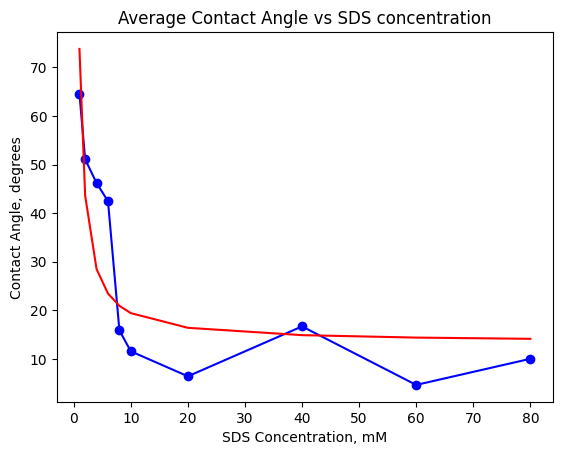

In [31]:
import matplotlib.pyplot as plt
import numpy as np


data = [
    67.229, 61.828, 48.927, 53.195, 46.123,
    46.264, 41.189, 43.717, 15.558, 16.225,
    8.352, 14.807, 6.558, 6.336, 12.686,
    20.721, 3.908, 5.433, 9.631, 10.456
]

sds_concentration = [1, 2, 4, 6, 8, 10, 20, 40, 60, 80]

def calculate_averages(data):
    averages = []
    for i in range(0, len(data), 2):
        avg = np.mean(data[i:i+2])
        averages.append(avg)
    return averages


averages = calculate_averages(data)
x_data = np.array(sds_concentration)
y_data = np.array(averages)


def reciprocal_function(x, a, b):
    return a / x + b

# Fit the data to the reciprocal function
fit_coefficients, _ = curve_fit(reciprocal_function, x_data, y_data)

def derivative_reciprocal_function(x, a):
    return -a / (x**2)

# Calculate the first derivative values
first_derivative_values = derivative_reciprocal_function(x_data, fit_coefficients[0])


def second_derivative_reciprocal_function(x, a):
    return 2 * a / (x**3)

# Calculate the second derivative values
second_derivative_values = second_derivative_reciprocal_function(x_data, fit_coefficients[0])

for index in range(len(first_derivative_values)):
    print(first_derivative_values[index])

### calculation of inflection points even though there is none present
inflection_points = []
for i in range(1, len(second_derivative_values)):
    if np.sign(second_derivative_values[i]) != np.sign(second_derivative_values[i - 1]):
        inflection_points.append(x_data[i])

for inflection_point in inflection_points:
    plt.axvline(x=inflection_point, color='orange', linestyle='--', label='Inflection Point')

plt.plot(x_data, y_data, color='blue', linestyle = '-', marker = 'o')
plt.plot(x_data, reciprocal_function(x_data, *fit_coefficients), label='Reciprocal Fit', color='red')
plt.xlabel('SDS Concentration, mM')
plt.ylabel('Contact Angle, degrees')
plt.title('Average Contact Angle vs SDS concentration')


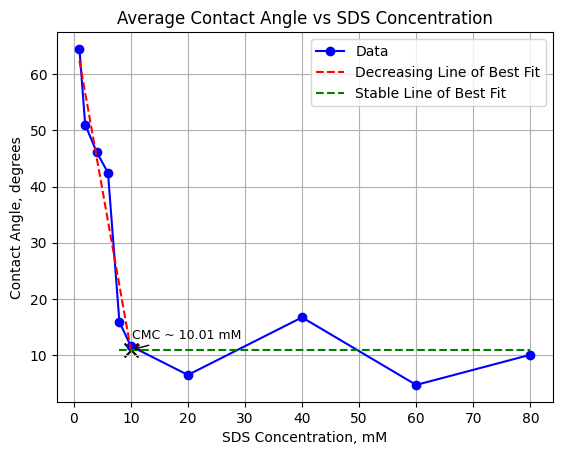

In [32]:


def line(x, a, b):
    return a*x + b
stable_state_start = 5

decreasing_fit = np.polyfit(sds_concentration[:stable_state_start+1], averages[:stable_state_start+1], 1)
stable_fit = np.polyfit(sds_concentration[stable_state_start-1:], averages[stable_state_start-1:], 0)

# Generate fitted lines
decreasing_line = [line(x, *decreasing_fit) for x in sds_concentration[:stable_state_start+1]]
stable_line = [line(x, 0, stable_fit[0]) for x in sds_concentration[stable_state_start-1:]]


intersection_x = (stable_fit[0] - decreasing_fit[1]) / decreasing_fit[0]
intersection_y = stable_fit[0]

# Plotting
plt.plot(sds_concentration, averages, marker='o', linestyle='-', color='b', label='Data')
plt.xlabel('SDS Concentration, mM')
plt.ylabel('Contact Angle, degrees')
plt.scatter(intersection_x, intersection_y, color = 'black', marker = 'x',s = 100)
plt.plot(sds_concentration[:stable_state_start+1], decreasing_line, linestyle='--', color='r', label='Decreasing Line of Best Fit')
plt.plot(sds_concentration[stable_state_start-1:], stable_line, linestyle='--', color='g', label='Stable Line of Best Fit')

cmc_text = f'CMC ~ {intersection_x:.2f} mM'
plt.annotate(cmc_text,
             xy=(intersection_x, intersection_y),
             xytext=(intersection_x + 0.2, intersection_y + 2),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=9)

plt.title('Average Contact Angle vs SDS Concentration')
plt.legend()
plt.grid(True)
plt.show()



Text(0.5, 1.0, 'Average Contact Angle vs CTAB Concentration')

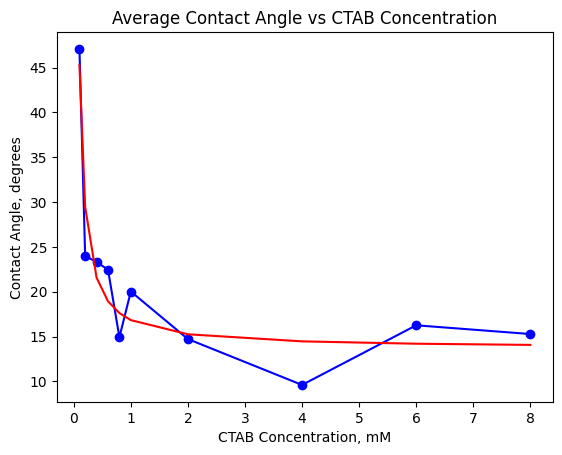

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

data = [
    46.727, 47.457, 24.078, 23.918, 22.631, 24.003,
    22.969, 21.964, 16.580, 13.271, 24.619, 15.433,
    14.138, 15.302, 10.767, 8.439, 15.755, 16.755, 17.759, 12.804
]

ctab_concentration = [0.1, 0.2, 0.4, 0.6, 0.8, 1, 2, 4, 6, 8]

def calculate_averages(data):
    averages = []
    for i in range(0, len(data), 2):
        avg = np.mean(data[i:i+2])
        averages.append(avg)
    return averages


averages = calculate_averages(data)
x_data = np.array(ctab_concentration)
y_data = np.array(averages)


def reciprocal_function(x, a, b):
    return a / x + b

# Fit the data to the reciprocal function
fit_coefficients, _ = curve_fit(reciprocal_function, x_data, y_data)

def derivative_reciprocal_function(x, a):
    return -a / (x**2)

# Calculate the first derivative values
first_derivative_values = derivative_reciprocal_function(x_data, fit_coefficients[0])


def second_derivative_reciprocal_function(x, a):
    return 2 * a / (x**3)

# Calculate the second derivative values
second_derivative_values = second_derivative_reciprocal_function(x_data, fit_coefficients[0])


inflection_points = []
for i in range(1, len(second_derivative_values)):
    if np.sign(second_derivative_values[i]) != np.sign(second_derivative_values[i - 1]):
        inflection_points.append(x_data[i])
for inflection_point in inflection_points:
    plt.axvline(x=inflection_point, color='orange', linestyle='--', label='Inflection Point')



plt.xlabel('CTAB Concentration, mM')
plt.ylabel('Contact Angle, degrees')
plt.plot(x_data, y_data, color='blue', linestyle = '-', marker = 'o')
plt.plot(x_data, reciprocal_function(x_data, *fit_coefficients), label='Reciprocal Fit', color='red')
plt.title('Average Contact Angle vs CTAB Concentration')


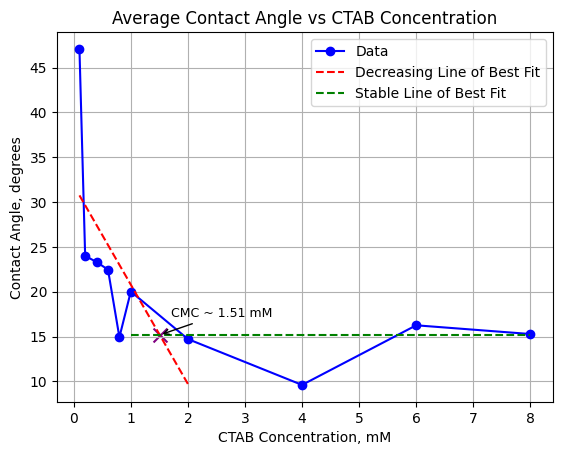

In [33]:
import matplotlib.pyplot as plt
import numpy as np

data = [
    46.727, 47.457, 24.078, 23.918, 22.631, 24.003,
    22.969, 21.964, 16.580, 13.271, 24.619, 15.433,
    14.138, 15.302, 10.767, 8.439, 15.755, 16.755, 17.759, 12.804
]

def calculate_averages(data):
    averages = []
    for i in range(0, len(data), 2):
        avg = np.mean(data[i:i+2])
        averages.append(avg)
    return averages

def line(x, a, b):
    return a*x + b

averages = calculate_averages(data)
stable_state_start = 6
ctab_concentration = [0.1, 0.2, 0.4, 0.6, 0.8, 1, 2, 4, 6, 8]

decreasing_fit = np.polyfit(ctab_concentration[:stable_state_start+1], averages[:stable_state_start+1], 1)
stable_fit = np.polyfit(ctab_concentration[stable_state_start-1:], averages[stable_state_start-1:], 0)

# Generate fitted lines
decreasing_line = [line(x, *decreasing_fit) for x in ctab_concentration[:stable_state_start+1]]
stable_line = [line(x, 0, stable_fit[0]) for x in ctab_concentration[stable_state_start-1:]]


intersection_x = (stable_fit[0] - decreasing_fit[1]) / decreasing_fit[0]
intersection_y = stable_fit[0]

# Plotting
plt.plot(ctab_concentration, averages, marker='o', linestyle='-', color='b', label='Data')
plt.xlabel('CTAB Concentration, mM')
plt.ylabel('Contact Angle, degrees')
plt.scatter(intersection_x, intersection_y, color = 'purple', marker = 'x',s = 100)
plt.plot(ctab_concentration[:stable_state_start+1], decreasing_line, linestyle='--', color='r', label='Decreasing Line of Best Fit')
plt.plot(ctab_concentration[stable_state_start-1:], stable_line, linestyle='--', color='g', label='Stable Line of Best Fit')

cmc_text = f'CMC ~ {intersection_x:.2f} mM'
plt.annotate(cmc_text,
             xy=(intersection_x, intersection_y),
             xytext=(intersection_x + 0.2, intersection_y + 2),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=9)

plt.title('Average Contact Angle vs CTAB Concentration')
plt.legend()
plt.grid(True)
plt.show()


In [38]:
import pandas as pd

dict = {'Concentration': sds_concentration, 'Average Angles': [round(angle,3) for angle in averages]}

df = pd.DataFrame(dict)

excel_file_path = 'sds_data.xlsx'


df.to_excel(excel_file_path, index=False)

,Concentration,Average Angles
0,1,47.092
1,2,23.998
2,4,23.317
3,6,22.466
4,8,14.926
5,10,20.026
6,20,14.720
7,40,9.603
8,60,16.255
9,80,15.282
